In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Praedico/NIFTY 50_Data.csv')

In [ ]:

df= df.iloc[::-1]
df

,Date,Open,High,Low,Close
5246,03-Jan-00,1482.15,1592.90,1482.15,1592.20
5245,04-Jan-00,1594.40,1641.95,1594.40,1638.70
5244,05-Jan-00,1634.55,1635.50,1555.05,1595.80
5243,06-Jan-00,1595.80,1639.00,1595.80,1617.60
5242,07-Jan-00,1616.60,1628.25,1597.20,1613.30
...,...,...,...,...,...
4,27-01-2021,14237.95,14237.95,13929.30,13967.50
3,28-01-2021,13810.40,13898.25,13713.25,13817.55
2,29-01-2021,13946.60,13966.85,13596.75,13634.60
1,01-02-2021,13758.60,14336.35,13661.75,14281.20


In [ ]:
#using close coloum for prediction
df1=df.reset_index()['Close']


In [ ]:

df1

0        1592.20
1        1638.70
2        1595.80
3        1617.60
4        1613.30
          ...   
5242    13967.50
5243    13817.55
5244    13634.60
5245    14281.20
5246    14647.80
Name: Close, Length: 5247, dtype: float64

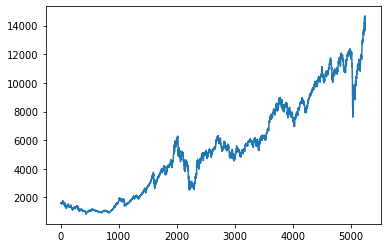

In [ ]:
#plotting the close data 
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
## preprocessing the data
import numpy as np


In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.05350307]
 [0.0568742 ]
 [0.05376406]
 ...
 [0.92654564]
 [0.97342246]
 [1.        ]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(4197, 1050)

In [ ]:
train_data

array([[0.05350307],
       [0.0568742 ],
       [0.05376406],
       ...,
       [0.55320946],
       [0.54949759],
       [0.55408668]])

In [ ]:

# convert an array of values into a dataset matrix 
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(4096, 100)
(4096,)
(949, 100)
(949,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape

(4096, 100, 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 151,301
Trainable params: 151,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
128/128 [==============================] - 8s 23ms/step - loss: 0.0085 - val_loss: 0.0011
Epoch 2/100
128/128 [==============================] - 2s 14ms/step - loss: 1.5436e-04 - val_loss: 0.0013
Epoch 3/100
128/128 [==============================] - 2s 14ms/step - loss: 1.7555e-04 - val_loss: 0.0012
Epoch 4/100
128/128 [==============================] - 2s 14ms/step - loss: 1.4337e-04 - val_loss: 0.0012
Epoch 5/100
128/128 [==============================] - 2s 14ms/step - loss: 1.4509e-04 - val_loss: 5.6505e-04
Epoch 6/100
128/128 [==============================] - 2s 14ms/step - loss: 1.3770e-04 - val_loss: 7.2534e-04
Epoch 7/100
128/128 [==============================] - 2s 14ms/step - loss: 1.2633e-04 - val_loss: 8.0891e-04
Epoch 8/100
128/128 [==============================] - 2s 14ms/step - loss: 1.0430e-04 - val_loss: 4.1919e-04
Epoch 9/100
128/128 [==============================] - 2s 14ms/step - loss: 9.1521e-05 - val_loss: 4.3782e-04
Epoch 10/100
128/128 [========

In [ ]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
yt=math.sqrt(mean_squared_error(y_train,train_predict))
print(yt)
### Test Data RMSE
yte=math.sqrt(mean_squared_error(ytest,test_predict))
print(yte)

4808.791765101228
10903.855020883142


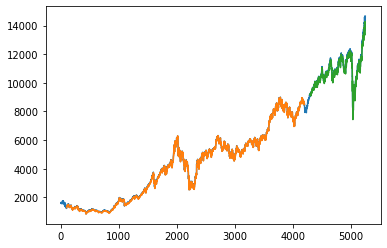

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#predict the next 30 days as len of test data is 1833 to calucate the output we will take last 100 days data 
x_input=test_data[950:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
#convert the data into list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next day
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<1):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #leave last day
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
      #this will run 
      # first reshape the data 
        x_input = x_input.reshape((1, n_steps,1))
        #predict the valve and save in yhat
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        # add to this list as the lenth is increased by 1 loop will go in if clause
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.97537506]
101
[[0.9753750562667847]]


In [ ]:
#Prediction for 18 January 2021
a = scaler.inverse_transform(lst_output)
a

array([[14308.13337612]])

In [ ]:
## saving the output into a csv
prediction = a[[0]]
print('Predicted value for next day=',prediction)
b = df['Close'].iloc[-1]
print('last close price=',b)
percentage = ((prediction-b)/b)*100
print('percentage change should be =', percentage.round(3),'%' )

Predicted value for next day= [[14308.13337612]]
last close price= 14647.8
percentage change should be = [[-2.319]] %
